# Semantic Web3 DAO

## Knowledge graph

### Domain: Decentralized Autonomous Organization (DAO)

Creation date: September 2022

Author: Maria-Cruz Valiente


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Image
import nxviz as nv

# DAOhaus

## 1. Import data files

In [3]:
# !tar xf datawarehouse/datawarehouse.tar.gz

#### NOTA:
En la siguiente URL se localiza la información de todo el esquema de datos de DAOhaus:
https://thegraph.com/hosted-service/subgraph/odyssy-automaton/daohaus-xdai

### DAOs

In [4]:
daos_df = pd.read_feather('datawarehouse/daohaus/moloches.arr')
daos_df

,network,id,name,version,summoner,summoningTime,timestamp,proposalCount,memberCount,voteCount,rageQuitCount,totalGas,molochAddress
0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,Zaibatsu-DAO,2.1,0x8435d0a8f19f748cba91863b70eb986895ee4b49,1662046800,1662046800,2,1,1,0,25655591000000000,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9
1,arbitrum,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,None,2.1,0x399540044cd5fd63bbc6cbec55a14232f65b457b,1652432312,1652432312,0,1,0,0,4446544408757082,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a
2,arbitrum,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,HIEROPHANT GREEN DAO,2.1,0xbe694be8e812ae1a99443b32041142c36597a772,1651054083,1651054083,0,1,0,0,1473413325719085,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8
3,arbitrum,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,None,2.1,0x0887a7d4ba8ed400f10b651b61ee49afa302c680,1636252707,1636252707,0,1,0,0,25403942773845900,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85
4,arbitrum,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,arb2,2.1,0xefd534f9663e5b4730114c4e0abb8001654c14bf,1657739577,1657739577,0,1,0,0,1005106271075452,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,xdai,0xff07943f171b826b3618982a6213f157fbc5e226,None,2.1,0xe5186799734b39245b8f13263a5437a36f83ec08,1636776040,1636776040,0,1,0,0,1740835005570672,0xff07943f171b826b3618982a6213f157fbc5e226
3320,xdai,0xff3f8c0b98454306fb0bda57e5ae38cbfa66cc0d,array.finance CCO,2.1,0x44bf6f5b5a5884e748fc87e10ddc4b6eb3c027c7,1610587390,1610587390,122,3,123,261,520335228221110355,0xff3f8c0b98454306fb0bda57e5ae38cbfa66cc0d
3321,xdai,0xff4b20d48a1e8f93bf6745de388547e731f96fd0,PRIDEdao,2.1,0xd11256d99f8833bee0b99203ddcfe4cd6c823d8d,1617550350,1617550350,0,2,0,0,768096000000000,0xff4b20d48a1e8f93bf6745de388547e731f96fd0
3322,xdai,0xffb676765d521518ac5c0d4f4067a9db9b72901b,EmpanaDAO,2,0x1b1e924a0a9c86a9023be9791bb81ecfb8cc4011,1598997685,1598997710,3,1,0,0,1803974000000000,0xffb676765d521518ac5c0d4f4067a9db9b72901b


In [5]:
daos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3324 entries, 0 to 3323
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   network        3324 non-null   object
 1   id             3324 non-null   object
 2   name           2632 non-null   object
 3   version        3324 non-null   object
 4   summoner       3324 non-null   object
 5   summoningTime  3324 non-null   object
 6   timestamp      3324 non-null   object
 7   proposalCount  3324 non-null   object
 8   memberCount    3324 non-null   object
 9   voteCount      3324 non-null   object
 10  rageQuitCount  3324 non-null   object
 11  totalGas       3324 non-null   object
 12  molochAddress  3324 non-null   object
dtypes: object(13)
memory usage: 337.7+ KB


In [6]:
# Create new field "createAt": Convert to date the field "timestamp".
daos_df['createdAt'] = pd.to_datetime(daos_df['timestamp'], unit='s')
daos_df.head()

,network,id,name,version,summoner,summoningTime,timestamp,proposalCount,memberCount,voteCount,rageQuitCount,totalGas,molochAddress,createdAt
0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,Zaibatsu-DAO,2.1,0x8435d0a8f19f748cba91863b70eb986895ee4b49,1662046800,1662046800,2,1,1,0,25655591000000000,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,2022-09-01 15:40:00
1,arbitrum,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,None,2.1,0x399540044cd5fd63bbc6cbec55a14232f65b457b,1652432312,1652432312,0,1,0,0,4446544408757082,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,2022-05-13 08:58:32
2,arbitrum,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,HIEROPHANT GREEN DAO,2.1,0xbe694be8e812ae1a99443b32041142c36597a772,1651054083,1651054083,0,1,0,0,1473413325719085,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,2022-04-27 10:08:03
3,arbitrum,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,None,2.1,0x0887a7d4ba8ed400f10b651b61ee49afa302c680,1636252707,1636252707,0,1,0,0,25403942773845900,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,2021-11-07 02:38:27
4,arbitrum,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,arb2,2.1,0xefd534f9663e5b4730114c4e0abb8001654c14bf,1657739577,1657739577,0,1,0,0,1005106271075452,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,2022-07-13 19:12:57


In [7]:
daos_df.createdAt.describe()

count                    3324
unique                   3280
top       2021-06-18 11:19:17
freq                        6
first     2019-02-14 08:01:37
last      2022-09-23 07:14:50
Name: createdAt, dtype: object

In [8]:
daos_df.molochAddress.value_counts()

0xf8484b3d9e8189d4743b0ecf35a87c58b76cee7b    2
0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9    1
0x55d2d4c65c649f04b75ad88df3338ff27c39763b    1
0x54d79e4e0094fae50dafe2c0cbd44301ac4e9704    1
0x54e47b9e968b418bbf1aec8193e22322ad8ef5c9    1
                                             ..
0x83aa7000d9fedad0ef78f9f5042a83d6bff727ca    1
0x8486a6fedc34fcb3d3a5a499eb47b63fc0fe513f    1
0x84c5b2ecd49359e6024b0b622369bb0794590794    1
0x84d07b96c1e3eaaf6c2ed878c7abcf6a97c53194    1
0xffe8a8ec2477390c6b97074f44326fac24d7f6dd    1
Name: molochAddress, Length: 3323, dtype: int64

In [9]:
# The same DAO, but in different networks => Error.  
daos_df[daos_df.molochAddress == '0xf8484b3d9e8189d4743b0ecf35a87c58b76cee7b']

,network,id,name,version,summoner,summoningTime,timestamp,proposalCount,memberCount,voteCount,rageQuitCount,totalGas,molochAddress,createdAt
577,mainnet,0xf8484b3d9e8189d4743b0ecf35a87c58b76cee7b,RealQuickDao,2,0xced608aa29bb92185d9b6340adcbfa263dae075b,1594417251,1594417294,0,1,0,0,3512421000000000,0xf8484b3d9e8189d4743b0ecf35a87c58b76cee7b,2020-07-10 21:41:34
3270,xdai,0xf8484b3d9e8189d4743b0ecf35a87c58b76cee7b,RealQuickDao,2,0xced608aa29bb92185d9b6340adcbfa263dae075b,1599065585,1599065630,28,1,19,14,678415684501877253,0xf8484b3d9e8189d4743b0ecf35a87c58b76cee7b,2020-09-02 16:53:50


In [10]:
# Delete one of them in order to clean data.
daos_df.drop(3270, inplace=True)

In [11]:
daos_df[daos_df.id == '0xf8484b3d9e8189d4743b0ecf35a87c58b76cee7b']

,network,id,name,version,summoner,summoningTime,timestamp,proposalCount,memberCount,voteCount,rageQuitCount,totalGas,molochAddress,createdAt
577,mainnet,0xf8484b3d9e8189d4743b0ecf35a87c58b76cee7b,RealQuickDao,2,0xced608aa29bb92185d9b6340adcbfa263dae075b,1594417251,1594417294,0,1,0,0,3512421000000000,0xf8484b3d9e8189d4743b0ecf35a87c58b76cee7b,2020-07-10 21:41:34


In [12]:
daos_df.reset_index(inplace =True, drop = True)
daos_df

,network,id,name,version,summoner,summoningTime,timestamp,proposalCount,memberCount,voteCount,rageQuitCount,totalGas,molochAddress,createdAt
0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,Zaibatsu-DAO,2.1,0x8435d0a8f19f748cba91863b70eb986895ee4b49,1662046800,1662046800,2,1,1,0,25655591000000000,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,2022-09-01 15:40:00
1,arbitrum,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,None,2.1,0x399540044cd5fd63bbc6cbec55a14232f65b457b,1652432312,1652432312,0,1,0,0,4446544408757082,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,2022-05-13 08:58:32
2,arbitrum,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,HIEROPHANT GREEN DAO,2.1,0xbe694be8e812ae1a99443b32041142c36597a772,1651054083,1651054083,0,1,0,0,1473413325719085,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,2022-04-27 10:08:03
3,arbitrum,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,None,2.1,0x0887a7d4ba8ed400f10b651b61ee49afa302c680,1636252707,1636252707,0,1,0,0,25403942773845900,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,2021-11-07 02:38:27
4,arbitrum,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,arb2,2.1,0xefd534f9663e5b4730114c4e0abb8001654c14bf,1657739577,1657739577,0,1,0,0,1005106271075452,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,2022-07-13 19:12:57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3318,xdai,0xff07943f171b826b3618982a6213f157fbc5e226,None,2.1,0xe5186799734b39245b8f13263a5437a36f83ec08,1636776040,1636776040,0,1,0,0,1740835005570672,0xff07943f171b826b3618982a6213f157fbc5e226,2021-11-13 04:00:40
3319,xdai,0xff3f8c0b98454306fb0bda57e5ae38cbfa66cc0d,array.finance CCO,2.1,0x44bf6f5b5a5884e748fc87e10ddc4b6eb3c027c7,1610587390,1610587390,122,3,123,261,520335228221110355,0xff3f8c0b98454306fb0bda57e5ae38cbfa66cc0d,2021-01-14 01:23:10
3320,xdai,0xff4b20d48a1e8f93bf6745de388547e731f96fd0,PRIDEdao,2.1,0xd11256d99f8833bee0b99203ddcfe4cd6c823d8d,1617550350,1617550350,0,2,0,0,768096000000000,0xff4b20d48a1e8f93bf6745de388547e731f96fd0,2021-04-04 15:32:30
3321,xdai,0xffb676765d521518ac5c0d4f4067a9db9b72901b,EmpanaDAO,2,0x1b1e924a0a9c86a9023be9791bb81ecfb8cc4011,1598997685,1598997710,3,1,0,0,1803974000000000,0xffb676765d521518ac5c0d4f4067a9db9b72901b,2020-09-01 22:01:50


In [13]:
daos_df.molochAddress.value_counts()

0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9    1
0x55cd67ec877ef72318b56df59a4c287c0a7925d3    1
0x54ba4208a807e74be5d922a19416e5d060de3c87    1
0x54d79e4e0094fae50dafe2c0cbd44301ac4e9704    1
0x54e47b9e968b418bbf1aec8193e22322ad8ef5c9    1
                                             ..
0x83793ef50076ce0400d1ffc4ae6d9cef66b6602d    1
0x83aa7000d9fedad0ef78f9f5042a83d6bff727ca    1
0x8486a6fedc34fcb3d3a5a499eb47b63fc0fe513f    1
0x84c5b2ecd49359e6024b0b622369bb0794590794    1
0xffe8a8ec2477390c6b97074f44326fac24d7f6dd    1
Name: molochAddress, Length: 3323, dtype: int64

In [14]:
daos_df = daos_df[["molochAddress", "name", "network", "createdAt"]]
daos_df.head()

,molochAddress,name,network,createdAt
0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,Zaibatsu-DAO,arbitrum,2022-09-01 15:40:00
1,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,None,arbitrum,2022-05-13 08:58:32
2,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,HIEROPHANT GREEN DAO,arbitrum,2022-04-27 10:08:03
3,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,None,arbitrum,2021-11-07 02:38:27
4,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,arb2,arbitrum,2022-07-13 19:12:57


In [15]:
daos_df.rename(columns = {'molochAddress':'daoAddress', 'network':'networkId'}, inplace = True)
daos_df

,daoAddress,name,networkId,createdAt
0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,Zaibatsu-DAO,arbitrum,2022-09-01 15:40:00
1,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,None,arbitrum,2022-05-13 08:58:32
2,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,HIEROPHANT GREEN DAO,arbitrum,2022-04-27 10:08:03
3,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,None,arbitrum,2021-11-07 02:38:27
4,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,arb2,arbitrum,2022-07-13 19:12:57
...,...,...,...,...
3318,0xff07943f171b826b3618982a6213f157fbc5e226,None,xdai,2021-11-13 04:00:40
3319,0xff3f8c0b98454306fb0bda57e5ae38cbfa66cc0d,array.finance CCO,xdai,2021-01-14 01:23:10
3320,0xff4b20d48a1e8f93bf6745de388547e731f96fd0,PRIDEdao,xdai,2021-04-04 15:32:30
3321,0xffb676765d521518ac5c0d4f4067a9db9b72901b,EmpanaDAO,xdai,2020-09-01 22:01:50


In [16]:
daos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3323 entries, 0 to 3322
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   daoAddress  3323 non-null   object        
 1   name        2631 non-null   object        
 2   networkId   3323 non-null   object        
 3   createdAt   3323 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 104.0+ KB


In [17]:
daos_df[daos_df["name"].isna()]

,daoAddress,name,networkId,createdAt
1,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,None,arbitrum,2022-05-13 08:58:32
3,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,None,arbitrum,2021-11-07 02:38:27
7,0x19b2b6c740884f34674c8fdf7072311703c34232,None,arbitrum,2022-07-10 18:19:10
8,0x1f30892dfbb665decf10d1ad9e183037d088f803,None,arbitrum,2022-04-28 14:33:29
9,0x207f9f27126e75fe48b577010078b1308d573069,None,arbitrum,2021-09-23 23:49:10
...,...,...,...,...
3293,0xfbf2755ade66b5ea5b32479f78c72c4243cd757a,None,xdai,2021-10-29 15:58:08
3298,0xfc4db029a51801e3a3a47348017e52769ff2c308,None,xdai,2021-12-18 20:05:45
3316,0xfeb8db3e033ed3cec78fff9ad3b43ac219db5c4b,None,xdai,2021-11-25 01:25:10
3317,0xfed1c9e27564b96053d00467c8e3de6baaebf02e,None,xdai,2021-11-12 14:38:30


In [18]:
daos_df["name"].fillna("Unknown", inplace = True)
daos_df

,daoAddress,name,networkId,createdAt
0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,Zaibatsu-DAO,arbitrum,2022-09-01 15:40:00
1,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,Unknown,arbitrum,2022-05-13 08:58:32
2,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,HIEROPHANT GREEN DAO,arbitrum,2022-04-27 10:08:03
3,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,Unknown,arbitrum,2021-11-07 02:38:27
4,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,arb2,arbitrum,2022-07-13 19:12:57
...,...,...,...,...
3318,0xff07943f171b826b3618982a6213f157fbc5e226,Unknown,xdai,2021-11-13 04:00:40
3319,0xff3f8c0b98454306fb0bda57e5ae38cbfa66cc0d,array.finance CCO,xdai,2021-01-14 01:23:10
3320,0xff4b20d48a1e8f93bf6745de388547e731f96fd0,PRIDEdao,xdai,2021-04-04 15:32:30
3321,0xffb676765d521518ac5c0d4f4067a9db9b72901b,EmpanaDAO,xdai,2020-09-01 22:01:50


In [19]:
daos_df.shape

(3323, 4)

### Members

In [20]:
dao_members_df = pd.read_feather('datawarehouse/daohaus/members.arr')
dao_members_df

,network,id,createdAt,molochAddress,memberAddress,shares,loot,exists,didRagequit
0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-mem...,1662046800,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,1,0,True,False
1,arbitrum,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a-mem...,1652432312,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,0x399540044cd5fd63bbc6cbec55a14232f65b457b,1,0,True,False
2,arbitrum,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8-mem...,1651054083,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,0xbe694be8e812ae1a99443b32041142c36597a772,1,0,True,False
3,arbitrum,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85-mem...,1636252707,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,0x0887a7d4ba8ed400f10b651b61ee49afa302c680,10,0,True,False
4,arbitrum,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc-mem...,1657739577,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,0xefd534f9663e5b4730114c4e0abb8001654c14bf,1,0,True,False
...,...,...,...,...,...,...,...,...,...
23707,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-mem...,1649900295,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,2,0,True,False
23708,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-mem...,1648067535,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0xda6e2ca279582a272afa2f702146747ee5bb988e,7,0,True,False
23709,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-mem...,1653538310,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0xdecda4a3ae29c4620ae08b61f6967502459e367d,50,0,True,False
23710,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-mem...,1662691880,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0xe4aaef7754147e723479c1b7cc8d636b29a4f5dc,0,0,False,False


In [21]:
dao_members_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23712 entries, 0 to 23711
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   network        23712 non-null  object
 1   id             23712 non-null  object
 2   createdAt      23712 non-null  object
 3   molochAddress  23712 non-null  object
 4   memberAddress  23712 non-null  object
 5   shares         23712 non-null  object
 6   loot           23712 non-null  object
 7   exists         23712 non-null  bool  
 8   didRagequit    23712 non-null  bool  
dtypes: bool(2), object(7)
memory usage: 1.3+ MB


In [22]:
dao_members_df['createdAt'] = pd.to_datetime(dao_members_df['createdAt'], unit='s')
dao_members_df.head()

,network,id,createdAt,molochAddress,memberAddress,shares,loot,exists,didRagequit
0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-mem...,2022-09-01 15:40:00,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,1,0,True,False
1,arbitrum,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a-mem...,2022-05-13 08:58:32,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,0x399540044cd5fd63bbc6cbec55a14232f65b457b,1,0,True,False
2,arbitrum,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8-mem...,2022-04-27 10:08:03,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,0xbe694be8e812ae1a99443b32041142c36597a772,1,0,True,False
3,arbitrum,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85-mem...,2021-11-07 02:38:27,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,0x0887a7d4ba8ed400f10b651b61ee49afa302c680,10,0,True,False
4,arbitrum,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc-mem...,2022-07-13 19:12:57,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,0xefd534f9663e5b4730114c4e0abb8001654c14bf,1,0,True,False


In [23]:
# Only members that are in the DAOs.
dao_members_df = dao_members_df[dao_members_df['molochAddress'].isin(daos_df['daoAddress'])]
dao_members_df

,network,id,createdAt,molochAddress,memberAddress,shares,loot,exists,didRagequit
0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-mem...,2022-09-01 15:40:00,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,1,0,True,False
1,arbitrum,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a-mem...,2022-05-13 08:58:32,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,0x399540044cd5fd63bbc6cbec55a14232f65b457b,1,0,True,False
2,arbitrum,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8-mem...,2022-04-27 10:08:03,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,0xbe694be8e812ae1a99443b32041142c36597a772,1,0,True,False
3,arbitrum,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85-mem...,2021-11-07 02:38:27,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,0x0887a7d4ba8ed400f10b651b61ee49afa302c680,10,0,True,False
4,arbitrum,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc-mem...,2022-07-13 19:12:57,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,0xefd534f9663e5b4730114c4e0abb8001654c14bf,1,0,True,False
...,...,...,...,...,...,...,...,...,...
23707,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-mem...,2022-04-14 01:38:15,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,2,0,True,False
23708,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-mem...,2022-03-23 20:32:15,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0xda6e2ca279582a272afa2f702146747ee5bb988e,7,0,True,False
23709,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-mem...,2022-05-26 04:11:50,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0xdecda4a3ae29c4620ae08b61f6967502459e367d,50,0,True,False
23710,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-mem...,2022-09-09 02:51:20,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0xe4aaef7754147e723479c1b7cc8d636b29a4f5dc,0,0,False,False


In [24]:
dao_members_df['isActive'] = ~dao_members_df['didRagequit']
dao_members_df.head()

,network,id,createdAt,molochAddress,memberAddress,shares,loot,exists,didRagequit,isActive
0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-mem...,2022-09-01 15:40:00,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,1,0,True,False,True
1,arbitrum,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a-mem...,2022-05-13 08:58:32,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,0x399540044cd5fd63bbc6cbec55a14232f65b457b,1,0,True,False,True
2,arbitrum,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8-mem...,2022-04-27 10:08:03,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,0xbe694be8e812ae1a99443b32041142c36597a772,1,0,True,False,True
3,arbitrum,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85-mem...,2021-11-07 02:38:27,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,0x0887a7d4ba8ed400f10b651b61ee49afa302c680,10,0,True,False,True
4,arbitrum,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc-mem...,2022-07-13 19:12:57,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,0xefd534f9663e5b4730114c4e0abb8001654c14bf,1,0,True,False,True


In [25]:
dao_members_df = dao_members_df[["memberAddress", "molochAddress", "shares", "loot", "isActive", "createdAt"]]
dao_members_df

,memberAddress,molochAddress,shares,loot,isActive,createdAt
0,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,1,0,True,2022-09-01 15:40:00
1,0x399540044cd5fd63bbc6cbec55a14232f65b457b,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,1,0,True,2022-05-13 08:58:32
2,0xbe694be8e812ae1a99443b32041142c36597a772,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,1,0,True,2022-04-27 10:08:03
3,0x0887a7d4ba8ed400f10b651b61ee49afa302c680,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,10,0,True,2021-11-07 02:38:27
4,0xefd534f9663e5b4730114c4e0abb8001654c14bf,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,1,0,True,2022-07-13 19:12:57
...,...,...,...,...,...,...
23707,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,2,0,True,2022-04-14 01:38:15
23708,0xda6e2ca279582a272afa2f702146747ee5bb988e,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,7,0,True,2022-03-23 20:32:15
23709,0xdecda4a3ae29c4620ae08b61f6967502459e367d,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,50,0,True,2022-05-26 04:11:50
23710,0xe4aaef7754147e723479c1b7cc8d636b29a4f5dc,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0,0,True,2022-09-09 02:51:20


In [26]:
dao_members_df.rename(columns = {'molochAddress':'daoAddress'}, inplace = True)
dao_members_df

,memberAddress,daoAddress,shares,loot,isActive,createdAt
0,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,1,0,True,2022-09-01 15:40:00
1,0x399540044cd5fd63bbc6cbec55a14232f65b457b,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,1,0,True,2022-05-13 08:58:32
2,0xbe694be8e812ae1a99443b32041142c36597a772,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,1,0,True,2022-04-27 10:08:03
3,0x0887a7d4ba8ed400f10b651b61ee49afa302c680,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,10,0,True,2021-11-07 02:38:27
4,0xefd534f9663e5b4730114c4e0abb8001654c14bf,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,1,0,True,2022-07-13 19:12:57
...,...,...,...,...,...,...
23707,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,2,0,True,2022-04-14 01:38:15
23708,0xda6e2ca279582a272afa2f702146747ee5bb988e,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,7,0,True,2022-03-23 20:32:15
23709,0xdecda4a3ae29c4620ae08b61f6967502459e367d,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,50,0,True,2022-05-26 04:11:50
23710,0xe4aaef7754147e723479c1b7cc8d636b29a4f5dc,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0,0,True,2022-09-09 02:51:20


In [27]:
dao_members_df.reset_index(inplace = True, drop = True)
dao_members_df

,memberAddress,daoAddress,shares,loot,isActive,createdAt
0,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,1,0,True,2022-09-01 15:40:00
1,0x399540044cd5fd63bbc6cbec55a14232f65b457b,0x0a96234adacd1e71c9b2a237cf12374f64e05e3a,1,0,True,2022-05-13 08:58:32
2,0xbe694be8e812ae1a99443b32041142c36597a772,0x0feb2ee31f9d8bcc580f18d4fe8ed9de61d02ff8,1,0,True,2022-04-27 10:08:03
3,0x0887a7d4ba8ed400f10b651b61ee49afa302c680,0x1543bcdf759c0fccbb375a8b8b0c5fd1393a9b85,10,0,True,2021-11-07 02:38:27
4,0xefd534f9663e5b4730114c4e0abb8001654c14bf,0x15663f6b20fb1d842b1b92897d7f16b91ebe8bbc,1,0,True,2022-07-13 19:12:57
...,...,...,...,...,...,...
23707,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,2,0,True,2022-04-14 01:38:15
23708,0xda6e2ca279582a272afa2f702146747ee5bb988e,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,7,0,True,2022-03-23 20:32:15
23709,0xdecda4a3ae29c4620ae08b61f6967502459e367d,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,50,0,True,2022-05-26 04:11:50
23710,0xe4aaef7754147e723479c1b7cc8d636b29a4f5dc,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0,0,True,2022-09-09 02:51:20


In [28]:
dao_members_df.shape

(23712, 6)

In [29]:
dao_members_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23712 entries, 0 to 23711
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   memberAddress  23712 non-null  object        
 1   daoAddress     23712 non-null  object        
 2   shares         23712 non-null  object        
 3   loot           23712 non-null  object        
 4   isActive       23712 non-null  bool          
 5   createdAt      23712 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 949.5+ KB


### Proposals

In [30]:
dao_proposals_df = pd.read_feather('datawarehouse/daohaus/proposals.arr')
dao_proposals_df

,network,id,createdAt,proposalId,molochAddress,memberAddress,proposer,sponsor,sharesRequested,lootRequested,...,paymentRequested,yesVotes,noVotes,sponsored,sponsoredAt,processed,processedAt,didPass,yesShares,noShares
0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,1662047614,0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x0000000000000000000000000000000000000000,50,0,...,0,0,0,False,None,False,None,False,0,0
1,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,1662048470,1,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,50,0,...,0,1,0,True,1662048521,False,None,False,1,0
2,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,1642252357,0,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,0,0,...,0,0,0,False,None,False,None,False,0,0
3,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,1642252710,1,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,1,0,...,0,0,0,False,None,False,None,False,0,0
4,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,1642253135,2,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,10,0,...,0,0,0,False,None,False,None,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45453,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,1641694325,6,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0x0ea26051f7657d59418da186137141cea90d0652,0x0ea26051f7657d59418da186137141cea90d0652,0x0ea26051f7657d59418da186137141cea90d0652,4,0,...,0,1,0,True,1641694390,True,1642425245,True,1,0
45454,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,1661893810,60,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0x0ea26051f7657d59418da186137141cea90d0652,0x0ea26051f7657d59418da186137141cea90d0652,0x0ea26051f7657d59418da186137141cea90d0652,0,0,...,0,5,0,True,1661893910,True,1662692755,True,22,0
45455,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,1642142360,7,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0x0ea26051f7657d59418da186137141cea90d0652,0x0ea26051f7657d59418da186137141cea90d0652,0x0ea26051f7657d59418da186137141cea90d0652,5,0,...,0,1,0,True,1642142425,True,1642897095,True,1,0
45456,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,1642963235,8,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0x0000000000000000000000000000000000000000,0x535d64eb74a24883944c9a44c02a2733f929bfff,0x0ea26051f7657d59418da186137141cea90d0652,1,0,...,0,1,0,True,1642963380,True,1643732800,True,1,0


In [31]:
dao_proposals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45458 entries, 0 to 45457
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   network           45458 non-null  object
 1   id                45458 non-null  object
 2   createdAt         45458 non-null  object
 3   proposalId        45458 non-null  object
 4   molochAddress     45458 non-null  object
 5   memberAddress     45458 non-null  object
 6   proposer          45458 non-null  object
 7   sponsor           45458 non-null  object
 8   sharesRequested   45458 non-null  object
 9   lootRequested     45458 non-null  object
 10  tributeOffered    45458 non-null  object
 11  paymentRequested  45458 non-null  object
 12  yesVotes          45458 non-null  object
 13  noVotes           45458 non-null  object
 14  sponsored         45458 non-null  bool  
 15  sponsoredAt       18579 non-null  object
 16  processed         45458 non-null  bool  
 17  processedAt 

In [32]:
dao_proposals_df['createdAt'] = pd.to_datetime(dao_proposals_df['createdAt'], unit='s')
dao_proposals_df.head()

,network,id,createdAt,proposalId,molochAddress,memberAddress,proposer,sponsor,sharesRequested,lootRequested,...,paymentRequested,yesVotes,noVotes,sponsored,sponsoredAt,processed,processedAt,didPass,yesShares,noShares
0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,2022-09-01 15:53:34,0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x0000000000000000000000000000000000000000,50,0,...,0,0,0,False,None,False,None,False,0,0
1,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,2022-09-01 16:07:50,1,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,50,0,...,0,1,0,True,1662048521,False,None,False,1,0
2,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2022-01-15 13:12:37,0,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,0,0,...,0,0,0,False,None,False,None,False,0,0
3,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2022-01-15 13:18:30,1,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,1,0,...,0,0,0,False,None,False,None,False,0,0
4,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2022-01-15 13:25:35,2,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,10,0,...,0,0,0,False,None,False,None,False,0,0


In [33]:
# Only proposals from the selected DAOs.
dao_proposals_df = dao_proposals_df[dao_proposals_df['molochAddress'].isin(daos_df['daoAddress'])]
dao_proposals_df

,network,id,createdAt,proposalId,molochAddress,memberAddress,proposer,sponsor,sharesRequested,lootRequested,...,paymentRequested,yesVotes,noVotes,sponsored,sponsoredAt,processed,processedAt,didPass,yesShares,noShares
0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,2022-09-01 15:53:34,0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x0000000000000000000000000000000000000000,50,0,...,0,0,0,False,None,False,None,False,0,0
1,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,2022-09-01 16:07:50,1,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,50,0,...,0,1,0,True,1662048521,False,None,False,1,0
2,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2022-01-15 13:12:37,0,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,0,0,...,0,0,0,False,None,False,None,False,0,0
3,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2022-01-15 13:18:30,1,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,1,0,...,0,0,0,False,None,False,None,False,0,0
4,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2022-01-15 13:25:35,2,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,10,0,...,0,0,0,False,None,False,None,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45453,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,2022-01-09 02:12:05,6,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0x0ea26051f7657d59418da186137141cea90d0652,0x0ea26051f7657d59418da186137141cea90d0652,0x0ea26051f7657d59418da186137141cea90d0652,4,0,...,0,1,0,True,1641694390,True,1642425245,True,1,0
45454,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,2022-08-30 21:10:10,60,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0x0ea26051f7657d59418da186137141cea90d0652,0x0ea26051f7657d59418da186137141cea90d0652,0x0ea26051f7657d59418da186137141cea90d0652,0,0,...,0,5,0,True,1661893910,True,1662692755,True,22,0
45455,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,2022-01-14 06:39:20,7,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0x0ea26051f7657d59418da186137141cea90d0652,0x0ea26051f7657d59418da186137141cea90d0652,0x0ea26051f7657d59418da186137141cea90d0652,5,0,...,0,1,0,True,1642142425,True,1642897095,True,1,0
45456,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,2022-01-23 18:40:35,8,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0x0000000000000000000000000000000000000000,0x535d64eb74a24883944c9a44c02a2733f929bfff,0x0ea26051f7657d59418da186137141cea90d0652,1,0,...,0,1,0,True,1642963380,True,1643732800,True,1,0


In [34]:
dao_proposals_df['processedAt'] = pd.to_datetime(dao_proposals_df['processedAt'], unit='s')
dao_proposals_df.head()

,network,id,createdAt,proposalId,molochAddress,memberAddress,proposer,sponsor,sharesRequested,lootRequested,...,paymentRequested,yesVotes,noVotes,sponsored,sponsoredAt,processed,processedAt,didPass,yesShares,noShares
0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,2022-09-01 15:53:34,0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x0000000000000000000000000000000000000000,50,0,...,0,0,0,False,None,False,NaT,False,0,0
1,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,2022-09-01 16:07:50,1,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,50,0,...,0,1,0,True,1662048521,False,NaT,False,1,0
2,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2022-01-15 13:12:37,0,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,0,0,...,0,0,0,False,None,False,NaT,False,0,0
3,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2022-01-15 13:18:30,1,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,1,0,...,0,0,0,False,None,False,NaT,False,0,0
4,arbitrum,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2022-01-15 13:25:35,2,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x0000000000000000000000000000000000000000,10,0,...,0,0,0,False,None,False,NaT,False,0,0


In [35]:
# Aquí vemos que hay proposalId que se repiten, pero son de diferentes DAOs, por eso pueden
# tener el mismo identificador de propuesta. Por tanto, el identificador que nos interesa realmente
# es el id.
dao_proposals_df = dao_proposals_df[["id", "proposalId", "proposer", "memberAddress", "molochAddress", 
                                     "paymentRequested", "processed", "processedAt", "yesVotes", "noVotes",
                                     "didPass", "createdAt"]]
dao_proposals_df

,id,proposalId,proposer,memberAddress,molochAddress,paymentRequested,processed,processedAt,yesVotes,noVotes,didPass,createdAt
0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,0,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0,False,NaT,0,0,False,2022-09-01 15:53:34
1,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,1,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0,False,NaT,1,0,False,2022-09-01 16:07:50
2,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,0,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:12:37
3,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,1,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:18:30
4,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:25:35
...,...,...,...,...,...,...,...,...,...,...,...,...
45453,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,6,0x0ea26051f7657d59418da186137141cea90d0652,0x0ea26051f7657d59418da186137141cea90d0652,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0,True,2022-01-17 13:14:05,1,0,True,2022-01-09 02:12:05
45454,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,60,0x0ea26051f7657d59418da186137141cea90d0652,0x0ea26051f7657d59418da186137141cea90d0652,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0,True,2022-09-09 03:05:55,5,0,True,2022-08-30 21:10:10
45455,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,7,0x0ea26051f7657d59418da186137141cea90d0652,0x0ea26051f7657d59418da186137141cea90d0652,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0,True,2022-01-23 00:18:15,1,0,True,2022-01-14 06:39:20
45456,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,8,0x535d64eb74a24883944c9a44c02a2733f929bfff,0x0000000000000000000000000000000000000000,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0,True,2022-02-01 16:26:40,1,0,True,2022-01-23 18:40:35


In [36]:
dao_proposals_df.rename(columns = {'molochAddress':'daoAddress', 'proposalId':'proposalCode', 
                                   'id':'proposalId'}, inplace = True)
dao_proposals_df

,proposalId,proposalCode,proposer,memberAddress,daoAddress,paymentRequested,processed,processedAt,yesVotes,noVotes,didPass,createdAt
0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,0,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0,False,NaT,0,0,False,2022-09-01 15:53:34
1,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,1,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0,False,NaT,1,0,False,2022-09-01 16:07:50
2,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,0,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:12:37
3,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,1,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:18:30
4,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:25:35
...,...,...,...,...,...,...,...,...,...,...,...,...
45453,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,6,0x0ea26051f7657d59418da186137141cea90d0652,0x0ea26051f7657d59418da186137141cea90d0652,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0,True,2022-01-17 13:14:05,1,0,True,2022-01-09 02:12:05
45454,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,60,0x0ea26051f7657d59418da186137141cea90d0652,0x0ea26051f7657d59418da186137141cea90d0652,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0,True,2022-09-09 03:05:55,5,0,True,2022-08-30 21:10:10
45455,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,7,0x0ea26051f7657d59418da186137141cea90d0652,0x0ea26051f7657d59418da186137141cea90d0652,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0,True,2022-01-23 00:18:15,1,0,True,2022-01-14 06:39:20
45456,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,8,0x535d64eb74a24883944c9a44c02a2733f929bfff,0x0000000000000000000000000000000000000000,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0,True,2022-02-01 16:26:40,1,0,True,2022-01-23 18:40:35


In [37]:
dao_proposals_df.reset_index(inplace = True, drop = True)
dao_proposals_df

,proposalId,proposalCode,proposer,memberAddress,daoAddress,paymentRequested,processed,processedAt,yesVotes,noVotes,didPass,createdAt
0,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,0,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0,False,NaT,0,0,False,2022-09-01 15:53:34
1,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...,1,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x8435d0a8f19f748cba91863b70eb986895ee4b49,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0,False,NaT,1,0,False,2022-09-01 16:07:50
2,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,0,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:12:37
3,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,1,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:18:30
4,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:25:35
...,...,...,...,...,...,...,...,...,...,...,...,...
45453,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,6,0x0ea26051f7657d59418da186137141cea90d0652,0x0ea26051f7657d59418da186137141cea90d0652,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0,True,2022-01-17 13:14:05,1,0,True,2022-01-09 02:12:05
45454,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,60,0x0ea26051f7657d59418da186137141cea90d0652,0x0ea26051f7657d59418da186137141cea90d0652,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0,True,2022-09-09 03:05:55,5,0,True,2022-08-30 21:10:10
45455,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,7,0x0ea26051f7657d59418da186137141cea90d0652,0x0ea26051f7657d59418da186137141cea90d0652,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0,True,2022-01-23 00:18:15,1,0,True,2022-01-14 06:39:20
45456,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,8,0x535d64eb74a24883944c9a44c02a2733f929bfff,0x0000000000000000000000000000000000000000,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0,True,2022-02-01 16:26:40,1,0,True,2022-01-23 18:40:35


In [38]:
dao_proposals_df.shape

(45458, 12)

In [39]:
# Select only the proposals of the last year.
dao_proposals_df = dao_proposals_df[dao_proposals_df.createdAt.between('2021-09-01', '2022-09-01')]
dao_proposals_df

,proposalId,proposalCode,proposer,memberAddress,daoAddress,paymentRequested,processed,processedAt,yesVotes,noVotes,didPass,createdAt
2,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,0,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:12:37
3,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,1,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:18:30
4,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:25:35
5,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265-pro...,0,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,0,False,NaT,0,0,False,2022-04-20 03:30:10
6,0x47839e5373cd204f96d49d3a253c0433a2a5f038-pro...,0,0x196e919f74baeafca10c313043848c39a8f5effd,0x196e919f74baeafca10c313043848c39a8f5effd,0x47839e5373cd204f96d49d3a253c0433a2a5f038,0,True,2022-02-03 16:46:21,0,0,False,2021-11-22 14:31:53
...,...,...,...,...,...,...,...,...,...,...,...,...
45453,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,6,0x0ea26051f7657d59418da186137141cea90d0652,0x0ea26051f7657d59418da186137141cea90d0652,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0,True,2022-01-17 13:14:05,1,0,True,2022-01-09 02:12:05
45454,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,60,0x0ea26051f7657d59418da186137141cea90d0652,0x0ea26051f7657d59418da186137141cea90d0652,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0,True,2022-09-09 03:05:55,5,0,True,2022-08-30 21:10:10
45455,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,7,0x0ea26051f7657d59418da186137141cea90d0652,0x0ea26051f7657d59418da186137141cea90d0652,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0,True,2022-01-23 00:18:15,1,0,True,2022-01-14 06:39:20
45456,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,8,0x535d64eb74a24883944c9a44c02a2733f929bfff,0x0000000000000000000000000000000000000000,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0,True,2022-02-01 16:26:40,1,0,True,2022-01-23 18:40:35


In [40]:
dao_proposals_df.reset_index(inplace = True, drop = True)
dao_proposals_df

,proposalId,proposalCode,proposer,memberAddress,daoAddress,paymentRequested,processed,processedAt,yesVotes,noVotes,didPass,createdAt
0,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,0,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:12:37
1,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,1,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:18:30
2,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9-pro...,2,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,0,False,NaT,0,0,False,2022-01-15 13:25:35
3,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265-pro...,0,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,0,False,NaT,0,0,False,2022-04-20 03:30:10
4,0x47839e5373cd204f96d49d3a253c0433a2a5f038-pro...,0,0x196e919f74baeafca10c313043848c39a8f5effd,0x196e919f74baeafca10c313043848c39a8f5effd,0x47839e5373cd204f96d49d3a253c0433a2a5f038,0,True,2022-02-03 16:46:21,0,0,False,2021-11-22 14:31:53
...,...,...,...,...,...,...,...,...,...,...,...,...
36759,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,6,0x0ea26051f7657d59418da186137141cea90d0652,0x0ea26051f7657d59418da186137141cea90d0652,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0,True,2022-01-17 13:14:05,1,0,True,2022-01-09 02:12:05
36760,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,60,0x0ea26051f7657d59418da186137141cea90d0652,0x0ea26051f7657d59418da186137141cea90d0652,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0,True,2022-09-09 03:05:55,5,0,True,2022-08-30 21:10:10
36761,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,7,0x0ea26051f7657d59418da186137141cea90d0652,0x0ea26051f7657d59418da186137141cea90d0652,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0,True,2022-01-23 00:18:15,1,0,True,2022-01-14 06:39:20
36762,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,8,0x535d64eb74a24883944c9a44c02a2733f929bfff,0x0000000000000000000000000000000000000000,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0,True,2022-02-01 16:26:40,1,0,True,2022-01-23 18:40:35


In [41]:
dao_proposals_df.shape

(36764, 12)

In [42]:
dao_proposals_df.createdAt.describe()

count                   36764
unique                  22671
top       2021-10-28 15:31:25
freq                       45
first     2021-09-01 00:36:30
last      2022-08-31 20:28:30
Name: createdAt, dtype: object

In [43]:
# Discard DAOs that are not in the new DAO list.
daos_df = daos_df[daos_df['daoAddress'].isin(dao_proposals_df['daoAddress'])]
daos_df

,daoAddress,name,networkId,createdAt
5,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,Cats DAO,arbitrum,2022-01-15 12:59:12
10,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,Space Crew,arbitrum,2022-04-17 20:19:22
20,0x47839e5373cd204f96d49d3a253c0433a2a5f038,CTRL (arbitrum),arbitrum,2021-11-22 14:19:53
27,0x751eda5aa0a1c026f51942e266ed82795428ae34,Fraktal,arbitrum,2021-11-02 21:41:58
58,0xea9916a3e6a28eca1c551ee3e78737336068395e,MC NFT Arboretum,arbitrum,2021-11-09 22:52:33
...,...,...,...,...
3306,0xfd40e29b40a6e03d4ff612af697d1e72ec5d24e4,BanyanDAO,xdai,2022-02-28 23:55:25
3311,0xfe1084bc16427e5eb7f13fc19bcd4e641f7d571f,Raid Guild,xdai,2021-02-18 17:05:15
3313,0xfe2d87b14dc0d0d60020b58314b6da197dbab9c6,WarGame,xdai,2021-10-14 19:08:05
3319,0xff3f8c0b98454306fb0bda57e5ae38cbfa66cc0d,array.finance CCO,xdai,2021-01-14 01:23:10


In [44]:
daos_df.reset_index(inplace = True, drop = True)
daos_df

,daoAddress,name,networkId,createdAt
0,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,Cats DAO,arbitrum,2022-01-15 12:59:12
1,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,Space Crew,arbitrum,2022-04-17 20:19:22
2,0x47839e5373cd204f96d49d3a253c0433a2a5f038,CTRL (arbitrum),arbitrum,2021-11-22 14:19:53
3,0x751eda5aa0a1c026f51942e266ed82795428ae34,Fraktal,arbitrum,2021-11-02 21:41:58
4,0xea9916a3e6a28eca1c551ee3e78737336068395e,MC NFT Arboretum,arbitrum,2021-11-09 22:52:33
...,...,...,...,...
940,0xfd40e29b40a6e03d4ff612af697d1e72ec5d24e4,BanyanDAO,xdai,2022-02-28 23:55:25
941,0xfe1084bc16427e5eb7f13fc19bcd4e641f7d571f,Raid Guild,xdai,2021-02-18 17:05:15
942,0xfe2d87b14dc0d0d60020b58314b6da197dbab9c6,WarGame,xdai,2021-10-14 19:08:05
943,0xff3f8c0b98454306fb0bda57e5ae38cbfa66cc0d,array.finance CCO,xdai,2021-01-14 01:23:10


In [45]:
# Discard members that are not in the new DAO list.
dao_members_df = dao_members_df[dao_members_df['daoAddress'].isin(dao_proposals_df['daoAddress'])]
dao_members_df

,memberAddress,daoAddress,shares,loot,isActive,createdAt
5,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,500000,0,True,2022-01-15 12:59:12
21,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,600,0,True,2022-04-17 20:19:22
22,0x17fba501df40e83605d01fbef7f68174537e361a,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,600,0,True,2022-04-17 20:19:22
23,0x85c0fea4a2a6de02a2d51108340cf4f08072d3ff,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,600,0,True,2022-04-17 20:19:22
24,0xa3d7c306e182121e63cb5258b27e35f11f70c4e5,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,600,0,True,2022-04-17 20:19:22
...,...,...,...,...,...,...
23707,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,2,0,True,2022-04-14 01:38:15
23708,0xda6e2ca279582a272afa2f702146747ee5bb988e,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,7,0,True,2022-03-23 20:32:15
23709,0xdecda4a3ae29c4620ae08b61f6967502459e367d,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,50,0,True,2022-05-26 04:11:50
23710,0xe4aaef7754147e723479c1b7cc8d636b29a4f5dc,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0,0,True,2022-09-09 02:51:20


In [46]:
dao_members_df.reset_index(inplace = True, drop = True)
dao_members_df

,memberAddress,daoAddress,shares,loot,isActive,createdAt
0,0x54c375c481f95ba43e2cecd6ef30631f55518f57,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,500000,0,True,2022-01-15 12:59:12
1,0x15c560d2d9eb3af98524aa73becba43e9e6cef02,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,600,0,True,2022-04-17 20:19:22
2,0x17fba501df40e83605d01fbef7f68174537e361a,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,600,0,True,2022-04-17 20:19:22
3,0x85c0fea4a2a6de02a2d51108340cf4f08072d3ff,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,600,0,True,2022-04-17 20:19:22
4,0xa3d7c306e182121e63cb5258b27e35f11f70c4e5,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,600,0,True,2022-04-17 20:19:22
...,...,...,...,...,...,...
14930,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,2,0,True,2022-04-14 01:38:15
14931,0xda6e2ca279582a272afa2f702146747ee5bb988e,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,7,0,True,2022-03-23 20:32:15
14932,0xdecda4a3ae29c4620ae08b61f6967502459e367d,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,50,0,True,2022-05-26 04:11:50
14933,0xe4aaef7754147e723479c1b7cc8d636b29a4f5dc,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0,0,True,2022-09-09 02:51:20


### Voters

In [47]:
dao_voters_df = pd.read_feather('datawarehouse/daohaus/votes.arr')
dao_voters_df

,network,id,createdAt,molochAddress,memberAddress,uintVote,proposalAddress
0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-mem...,1662062323,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,1,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...
1,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,1636740912,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,2,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
2,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,1638118727,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
3,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,1636739724,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
4,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,1638462153,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
...,...,...,...,...,...,...,...
45802,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-mem...,1652723580,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,1,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...
45803,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-mem...,1652723660,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,1,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...
45804,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-mem...,1652723745,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,1,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...
45805,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-mem...,1652983990,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,1,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...


In [48]:
dao_voters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45807 entries, 0 to 45806
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   network          45807 non-null  object
 1   id               45807 non-null  object
 2   createdAt        45807 non-null  object
 3   molochAddress    45807 non-null  object
 4   memberAddress    45807 non-null  object
 5   uintVote         45807 non-null  int64 
 6   proposalAddress  45807 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.4+ MB


In [49]:
dao_voters_df['createdAt'] = pd.to_datetime(dao_voters_df['createdAt'], unit='s')
dao_voters_df

,network,id,createdAt,molochAddress,memberAddress,uintVote,proposalAddress
0,arbitrum,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-mem...,2022-09-01 19:58:43,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9,0x8435d0a8f19f748cba91863b70eb986895ee4b49,1,0x02c6c33b9bb6b2fc8ae9ab43a0235f4d7897b5d9-pro...
1,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-12 18:15:12,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,2,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
2,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-28 16:58:47,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
3,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-12 17:55:24,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
4,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-12-02 16:22:33,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
...,...,...,...,...,...,...,...
45802,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-mem...,2022-05-16 17:53:00,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,1,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...
45803,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-mem...,2022-05-16 17:54:20,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,1,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...
45804,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-mem...,2022-05-16 17:55:45,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,1,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...
45805,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-mem...,2022-05-19 18:13:10,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,1,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...


In [50]:
# Select only votes of the proposal list.
dao_voters_df = dao_voters_df[dao_voters_df.proposalAddress.isin(dao_proposals_df["proposalId"])]
dao_voters_df

,network,id,createdAt,molochAddress,memberAddress,uintVote,proposalAddress
1,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-12 18:15:12,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,2,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
2,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-28 16:58:47,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
3,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-12 17:55:24,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
4,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-12-02 16:22:33,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
5,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-12-14 02:12:55,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
...,...,...,...,...,...,...,...
45802,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-mem...,2022-05-16 17:53:00,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,1,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...
45803,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-mem...,2022-05-16 17:54:20,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,1,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...
45804,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-mem...,2022-05-16 17:55:45,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,1,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...
45805,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-mem...,2022-05-19 18:13:10,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,1,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...


In [51]:
dao_voters_df.reset_index(inplace = True, drop = True)
dao_voters_df

,network,id,createdAt,molochAddress,memberAddress,uintVote,proposalAddress
0,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-12 18:15:12,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,2,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
1,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-28 16:58:47,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
2,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-12 17:55:24,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
3,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-12-02 16:22:33,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
4,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-12-14 02:12:55,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
...,...,...,...,...,...,...,...
32130,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-mem...,2022-05-16 17:53:00,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,1,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...
32131,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-mem...,2022-05-16 17:54:20,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,1,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...
32132,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-mem...,2022-05-16 17:55:45,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,1,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...
32133,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-mem...,2022-05-19 18:13:10,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,1,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...


In [52]:
# Nos aseguramos también que todas esas daos estén en la lista de daos de las propuestas
# seleccionadas.
dao_voters_df = dao_voters_df[dao_voters_df.molochAddress.isin(dao_proposals_df["daoAddress"])]
dao_voters_df

,network,id,createdAt,molochAddress,memberAddress,uintVote,proposalAddress
0,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-12 18:15:12,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,2,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
1,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-28 16:58:47,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
2,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-12 17:55:24,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
3,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-12-02 16:22:33,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
4,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-12-14 02:12:55,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...
...,...,...,...,...,...,...,...
32130,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-mem...,2022-05-16 17:53:00,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,1,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...
32131,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-mem...,2022-05-16 17:54:20,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,1,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...
32132,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-mem...,2022-05-16 17:55:45,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,1,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...
32133,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-mem...,2022-05-19 18:13:10,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,1,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...


In [53]:
def member_participation (value):
    if value == 1:
        return True
    else:
        return False

In [54]:
dao_voters_df['hasVoted'] = dao_voters_df['uintVote'].map(member_participation)
dao_voters_df.head()

,network,id,createdAt,molochAddress,memberAddress,uintVote,proposalAddress,hasVoted
0,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-12 18:15:12,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,2,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,False
1,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-28 16:58:47,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,True
2,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-11-12 17:55:24,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,True
3,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-12-02 16:22:33,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,True
4,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-mem...,2021-12-14 02:12:55,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,True


In [55]:
dao_voters_df = dao_voters_df[["proposalAddress", "memberAddress", "molochAddress", 
                               "hasVoted", "createdAt"]]
dao_voters_df.head()

,proposalAddress,memberAddress,molochAddress,hasVoted,createdAt
0,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,0x751eda5aa0a1c026f51942e266ed82795428ae34,False,2021-11-12 18:15:12
1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,0x751eda5aa0a1c026f51942e266ed82795428ae34,True,2021-11-28 16:58:47
2,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,0x751eda5aa0a1c026f51942e266ed82795428ae34,True,2021-11-12 17:55:24
3,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,0x751eda5aa0a1c026f51942e266ed82795428ae34,True,2021-12-02 16:22:33
4,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,0x751eda5aa0a1c026f51942e266ed82795428ae34,True,2021-12-14 02:12:55


In [56]:
dao_voters_df.rename(columns = {'molochAddress':'daoAddress', 'proposalAddress':'proposalId'}, inplace = True)
dao_voters_df.head()

,proposalId,memberAddress,daoAddress,hasVoted,createdAt
0,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,0x751eda5aa0a1c026f51942e266ed82795428ae34,False,2021-11-12 18:15:12
1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,0x751eda5aa0a1c026f51942e266ed82795428ae34,True,2021-11-28 16:58:47
2,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,0x751eda5aa0a1c026f51942e266ed82795428ae34,True,2021-11-12 17:55:24
3,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,0x751eda5aa0a1c026f51942e266ed82795428ae34,True,2021-12-02 16:22:33
4,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,0x751eda5aa0a1c026f51942e266ed82795428ae34,True,2021-12-14 02:12:55


In [57]:
dao_voters_df.reset_index(inplace = True, drop = True)
dao_voters_df

,proposalId,memberAddress,daoAddress,hasVoted,createdAt
0,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,0x751eda5aa0a1c026f51942e266ed82795428ae34,False,2021-11-12 18:15:12
1,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0x46ec2102eb83ef52a1193489d52f22d6c1b1b97d,0x751eda5aa0a1c026f51942e266ed82795428ae34,True,2021-11-28 16:58:47
2,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,0x751eda5aa0a1c026f51942e266ed82795428ae34,True,2021-11-12 17:55:24
3,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,0x751eda5aa0a1c026f51942e266ed82795428ae34,True,2021-12-02 16:22:33
4,0x751eda5aa0a1c026f51942e266ed82795428ae34-pro...,0x77fa39f3adf09bde9d4f175e40d0854d21a33318,0x751eda5aa0a1c026f51942e266ed82795428ae34,True,2021-12-14 02:12:55
...,...,...,...,...,...
32130,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,True,2022-05-16 17:53:00
32131,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,True,2022-05-16 17:54:20
32132,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,True,2022-05-16 17:55:45
32133,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-pro...,0xda4ea032e9720468c3044b4a8e356568cfeb3e03,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,True,2022-05-19 18:13:10


In [58]:
dao_voters_df.shape

(32135, 5)

### Tokens

In [59]:
dao_tokens_df = pd.read_feather('datawarehouse/daohaus/tokenBalances.arr')
dao_tokens_df

,network,id,balance,molochAddress,tokenAddress,symbol,decimals,bank,balanceFloat,usdValue,ethValue,eurValue
0,arbitrum,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb-tok...,10000000000000000,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,18,guild,0.010000,15.474200,0.010020,15.130700
1,arbitrum,0x751eda5aa0a1c026f51942e266ed82795428ae34-tok...,10000000000000000,0x751eda5aa0a1c026f51942e266ed82795428ae34,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,18,guild,0.010000,15.474200,0.010020,15.130700
2,arbitrum,0xea9916a3e6a28eca1c551ee3e78737336068395e-tok...,1607593024732297159,0xea9916a3e6a28eca1c551ee3e78737336068395e,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,18,guild,1.607593,2487.621598,1.610808,2432.400778
3,arbitrum,0xefa202ed28b4efbaf835c30a4f1a64ae71078487-tok...,10000000000000000,0xefa202ed28b4efbaf835c30a4f1a64ae71078487,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,18,guild,0.010000,15.474200,0.010020,15.130700
4,arbitrum,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d-tok...,53662939787370448,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,18,guild,0.053663,83.039106,0.053770,81.195784
...,...,...,...,...,...,...,...,...,...,...,...,...
798,xdai,0xff3f8c0b98454306fb0bda57e5ae38cbfa66cc0d-tok...,1350483558737015483,0xff3f8c0b98454306fb0bda57e5ae38cbfa66cc0d,0x6a023ccd1ff6f2045c3309768ead9e68f978f6e1,WETH,18,guild,1.350484,2212.686282,1.351834,2208.918433
799,xdai,0xff3f8c0b98454306fb0bda57e5ae38cbfa66cc0d-tok...,119967595506805289743,0xff3f8c0b98454306fb0bda57e5ae38cbfa66cc0d,0xb0c5f3100a4d9d9532a4cfd68c55f1ae8da987eb,HAUS,18,guild,119.967596,NaN,NaN,NaN
800,xdai,0xff3f8c0b98454306fb0bda57e5ae38cbfa66cc0d-tok...,40204270272581729393357,0xff3f8c0b98454306fb0bda57e5ae38cbfa66cc0d,0xe91d153e0b41518a2ce8dd3d7944fa863463a97d,WXDAI,18,guild,40204.270273,NaN,NaN,NaN
801,xdai,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-tok...,260000000,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd,0xddafbb505ad214d7b80b1f830fccc89b60fb7a83,USDC,6,guild,260.000000,259.948000,0.150826,258.284000


In [60]:
dao_tokens_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   network        803 non-null    object 
 1   id             803 non-null    object 
 2   balance        803 non-null    object 
 3   molochAddress  803 non-null    object 
 4   tokenAddress   803 non-null    object 
 5   symbol         803 non-null    object 
 6   decimals       803 non-null    int64  
 7   bank           803 non-null    object 
 8   balanceFloat   803 non-null    float64
 9   usdValue       185 non-null    float64
 10  ethValue       185 non-null    float64
 11  eurValue       185 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 75.4+ KB


In [61]:
dao_tokens_df = dao_tokens_df[["id", "tokenAddress", "symbol", "usdValue", "molochAddress"]]
dao_tokens_df.head()

,id,tokenAddress,symbol,usdValue,molochAddress
0,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,15.474200,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb
1,0x751eda5aa0a1c026f51942e266ed82795428ae34-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,15.474200,0x751eda5aa0a1c026f51942e266ed82795428ae34
2,0xea9916a3e6a28eca1c551ee3e78737336068395e-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,2487.621598,0xea9916a3e6a28eca1c551ee3e78737336068395e
3,0xefa202ed28b4efbaf835c30a4f1a64ae71078487-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,15.474200,0xefa202ed28b4efbaf835c30a4f1a64ae71078487
4,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,83.039106,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d


In [62]:
dao_tokens_df.rename(columns = {'id':'tokenId', 'molochAddress':'daoAddress'}, inplace = True)
dao_tokens_df.head()

,tokenId,tokenAddress,symbol,usdValue,daoAddress
0,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,15.474200,0x1817f4cac037aab7b983b8be9d84cb78fcbdb2cb
1,0x751eda5aa0a1c026f51942e266ed82795428ae34-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,15.474200,0x751eda5aa0a1c026f51942e266ed82795428ae34
2,0xea9916a3e6a28eca1c551ee3e78737336068395e-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,2487.621598,0xea9916a3e6a28eca1c551ee3e78737336068395e
3,0xefa202ed28b4efbaf835c30a4f1a64ae71078487-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,15.474200,0xefa202ed28b4efbaf835c30a4f1a64ae71078487
4,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,83.039106,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d


In [63]:
dao_tokens_df.shape

(803, 5)

In [64]:
# Only the DAOs that are in the list of valid DAOs.
dao_tokens_df = dao_tokens_df[dao_tokens_df.daoAddress.isin(dao_proposals_df["daoAddress"])]
dao_tokens_df.head()

,tokenId,tokenAddress,symbol,usdValue,daoAddress
1,0x751eda5aa0a1c026f51942e266ed82795428ae34-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,15.474200,0x751eda5aa0a1c026f51942e266ed82795428ae34
2,0xea9916a3e6a28eca1c551ee3e78737336068395e-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,2487.621598,0xea9916a3e6a28eca1c551ee3e78737336068395e
3,0xefa202ed28b4efbaf835c30a4f1a64ae71078487-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,15.474200,0xefa202ed28b4efbaf835c30a4f1a64ae71078487
4,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,83.039106,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d
5,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d-tok...,0xda10009cbd5d07dd0cecc66161fc93d7c9000da1,DAI,9.999000,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d


In [65]:
dao_tokens_df.reset_index(inplace = True, drop = True)
dao_tokens_df

,tokenId,tokenAddress,symbol,usdValue,daoAddress
0,0x751eda5aa0a1c026f51942e266ed82795428ae34-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,15.474200,0x751eda5aa0a1c026f51942e266ed82795428ae34
1,0xea9916a3e6a28eca1c551ee3e78737336068395e-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,2487.621598,0xea9916a3e6a28eca1c551ee3e78737336068395e
2,0xefa202ed28b4efbaf835c30a4f1a64ae71078487-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,15.474200,0xefa202ed28b4efbaf835c30a4f1a64ae71078487
3,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d-tok...,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,WETH,83.039106,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d
4,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d-tok...,0xda10009cbd5d07dd0cecc66161fc93d7c9000da1,DAI,9.999000,0xf2ebff62ff6cc2e90f2ec0f1a6a241d3628d810d
...,...,...,...,...,...
546,0xff3f8c0b98454306fb0bda57e5ae38cbfa66cc0d-tok...,0x6a023ccd1ff6f2045c3309768ead9e68f978f6e1,WETH,2212.686282,0xff3f8c0b98454306fb0bda57e5ae38cbfa66cc0d
547,0xff3f8c0b98454306fb0bda57e5ae38cbfa66cc0d-tok...,0xb0c5f3100a4d9d9532a4cfd68c55f1ae8da987eb,HAUS,NaN,0xff3f8c0b98454306fb0bda57e5ae38cbfa66cc0d
548,0xff3f8c0b98454306fb0bda57e5ae38cbfa66cc0d-tok...,0xe91d153e0b41518a2ce8dd3d7944fa863463a97d,WXDAI,NaN,0xff3f8c0b98454306fb0bda57e5ae38cbfa66cc0d
549,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd-tok...,0xddafbb505ad214d7b80b1f830fccc89b60fb7a83,USDC,259.948000,0xffe8a8ec2477390c6b97074f44326fac24d7f6dd


In [66]:
dao_tokens_df.shape

(551, 5)

## 2. Create auxiliary data sources

### Blockhains

In [67]:
blockchains = [{"blockchainId": "arbitrum", "blockchainName" : "Arbitrum Rynkeby", "parentBlockchain": "ethereum"}, 
     {"blockchainId": "ethereum", "blockchainName" : "Ethereum", "parentBlockchain": ""},
     {"blockchainId": "gnosis", "blockchainName" : "Gnosis Chain", "parentBlockchain": "ethereum"},
     {"blockchainId": "polygon", "blockchainName" : "Polygon", "parentBlockchain": "ethereum"}
    ]

In [68]:
blockchains_df = pd.DataFrame(blockchains)
blockchains_df

,blockchainId,blockchainName,parentBlockchain
0,arbitrum,Arbitrum Rynkeby,ethereum
1,ethereum,Ethereum,
2,gnosis,Gnosis Chain,ethereum
3,polygon,Polygon,ethereum


### Networks

In [69]:
nets = [{"networkId" : "xdai" , "networkName" : "xDAI", "blockchainId": "gnosis"},
        {"networkId" : "polygon" , "networkName" : "Polygon", "blockchainId": "polygon"},
        {"networkId" : "mainnet" , "networkName" : "Ethereum Mainnet", "blockchainId": "ethereum"},
        {"networkId" : "arbitrum" , "networkName" : "Arbitrum Rinkeby", "blockchainId": "arbitrum"}
       ]

In [70]:
networks_df = pd.DataFrame(nets)
networks_df

,networkId,networkName,blockchainId
0,xdai,xDAI,gnosis
1,polygon,Polygon,polygon
2,mainnet,Ethereum Mainnet,ethereum
3,arbitrum,Arbitrum Rinkeby,arbitrum


### Smart contracts

In [71]:
smart_contracts_df = daos_df[["daoAddress", "networkId"]]
smart_contracts_df

,daoAddress,networkId
0,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,arbitrum
1,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,arbitrum
2,0x47839e5373cd204f96d49d3a253c0433a2a5f038,arbitrum
3,0x751eda5aa0a1c026f51942e266ed82795428ae34,arbitrum
4,0xea9916a3e6a28eca1c551ee3e78737336068395e,arbitrum
...,...,...
940,0xfd40e29b40a6e03d4ff612af697d1e72ec5d24e4,xdai
941,0xfe1084bc16427e5eb7f13fc19bcd4e641f7d571f,xdai
942,0xfe2d87b14dc0d0d60020b58314b6da197dbab9c6,xdai
943,0xff3f8c0b98454306fb0bda57e5ae38cbfa66cc0d,xdai


In [72]:
smart_contracts_df.rename(columns = {'daoAddress':'scAddress'}, inplace = True)
smart_contracts_df.head()

,scAddress,networkId
0,0x15909f6e92e32a6c3187fad2f7ea91f2b3dfdcf9,arbitrum
1,0x26f43f0511f65c9e9c4ef7d6c444c986f5513265,arbitrum
2,0x47839e5373cd204f96d49d3a253c0433a2a5f038,arbitrum
3,0x751eda5aa0a1c026f51942e266ed82795428ae34,arbitrum
4,0xea9916a3e6a28eca1c551ee3e78737336068395e,arbitrum


### EOAs

In [73]:
# Member list
members_np = dao_members_df.memberAddress.values
members_np = np.unique(members_np)
members_np

array(['0x000000000000000000000000000000000000dead',
       '0x0000000000086013192a2c9a506742a43c916e1e',
       '0x00000000005dbcb0d0513fcda746382fe8a53468', ...,
       '0xffe87b3be244b4e951c37d3fc6121c3de5b70a32',
       '0xffe885e77fd52cc2821ad2b7eef0051c53f4930e',
       '0xffefdcfff613c9bbb9928f6ff44f07c7b562bfdf'], dtype=object)

In [74]:
# Proposer list
proposers_np = dao_proposals_df.proposer.values
proposers_np = np.unique(proposers_np)
proposers_np

array(['0x0000000000086013192a2c9a506742a43c916e1e',
       '0x000000064730640b7d670408d74280924883064f',
       '0x0000000813b34008a225de08a6a61835508c71f9', ...,
       '0xfff3fb4a8d274f1663c0f8daa7f64b623639e394',
       '0xfff5dc137ff3aba0fd5a63a90269c60a055d1859',
       '0xfff9ccf69537ea16d2613817ae482e3d18e18de6'], dtype=object)

In [75]:
eoas_np = np.concatenate([members_np, proposers_np])
eoas_np = np.unique(eoas_np)
eoas_np

array(['0x000000000000000000000000000000000000dead',
       '0x0000000000086013192a2c9a506742a43c916e1e',
       '0x00000000005dbcb0d0513fcda746382fe8a53468', ...,
       '0xfff3fb4a8d274f1663c0f8daa7f64b623639e394',
       '0xfff5dc137ff3aba0fd5a63a90269c60a055d1859',
       '0xfff9ccf69537ea16d2613817ae482e3d18e18de6'], dtype=object)

In [76]:
# Remove the firt element since it seems a wrong address.
eoas_np = np.delete(eoas_np, 0)
eoas_np

array(['0x0000000000086013192a2c9a506742a43c916e1e',
       '0x00000000005dbcb0d0513fcda746382fe8a53468',
       '0x000000064730640b7d670408d74280924883064f', ...,
       '0xfff3fb4a8d274f1663c0f8daa7f64b623639e394',
       '0xfff5dc137ff3aba0fd5a63a90269c60a055d1859',
       '0xfff9ccf69537ea16d2613817ae482e3d18e18de6'], dtype=object)

In [77]:
eoas_df = pd.DataFrame(eoas_np, columns=["eoaAddress"])
eoas_df

,eoaAddress
0,0x0000000000086013192a2c9a506742a43c916e1e
1,0x00000000005dbcb0d0513fcda746382fe8a53468
2,0x000000064730640b7d670408d74280924883064f
3,0x0000000813b34008a225de08a6a61835508c71f9
4,0x00000016f127c94a667ae3c9fdf0c31c9c79826f
...,...
20523,0xffec9f69488f5ee35d0705a942981489f10118cb
20524,0xffefdcfff613c9bbb9928f6ff44f07c7b562bfdf
20525,0xfff3fb4a8d274f1663c0f8daa7f64b623639e394
20526,0xfff5dc137ff3aba0fd5a63a90269c60a055d1859


### Wallets

In [78]:
wallets = [{"walletId": "fortmatic", "walletName" : "Fortmatic", "walletUrl":"https://fortmatic.com/"},
           {"walletId": "frame", "walletName" : "Frame", "walletUrl":"https://frame.sh/"},
           {"walletId": "metamask", "walletName" : "MetaMask", "walletUrl":"https://metamask.io/"},
           {"walletId": "portis", "walletName" : "Portis", "walletUrl":"https://wallet.portis.io/login"},
           {"walletId": "walletconnect", "walletName" : "WalletConnect", "walletUrl":"https://walletconnect.com/"},           
          ]

In [79]:
wallets_df = pd.DataFrame(wallets)
wallets_df

,walletId,walletName,walletUrl
0,fortmatic,Fortmatic,https://fortmatic.com/
1,frame,Frame,https://frame.sh/
2,metamask,MetaMask,https://metamask.io/
3,portis,Portis,https://wallet.portis.io/login
4,walletconnect,WalletConnect,https://walletconnect.com/


## 3. Create nodes and edges for the knowledge graph

### 3.1. Nodes

In [80]:
# Create directed graph.
g_daos = nx.DiGraph()

In [81]:
concepts = ["Blockchain", "Token", "Network", "Dapp",
            "DAO", "ContractAccount", "SmartContract",
            "WebInterface", "EOA", "Member", "Proposal", 
            "Vote", "Wallet"]

In [82]:
for item in concepts:
    g_daos.add_node(item)

In [83]:
# Listamos los nodos/conceptos que tenemos actualmente.
list(g_daos.nodes())

['Blockchain',
 'Token',
 'Network',
 'Dapp',
 'DAO',
 'ContractAccount',
 'SmartContract',
 'WebInterface',
 'EOA',
 'Member',
 'Proposal',
 'Vote',
 'Wallet']

In [84]:
# Asignamos un color a cada nodo.
g_daos.nodes["Blockchain"]['color'] = 'green'
g_daos.nodes["Token"]['color'] = 'gold'
g_daos.nodes["Network"]['color'] = 'pink'
g_daos.nodes["Dapp"]['color'] = 'plum'
g_daos.nodes["DAO"]['color'] = 'mediumorchid'
g_daos.nodes["WebInterface"]['color'] = 'slateblue'
g_daos.nodes["ContractAccount"]['color'] = 'papayawhip'
g_daos.nodes["SmartContract"]['color'] = 'tomato'
g_daos.nodes["EOA"]['color'] = 'cornflowerblue'
g_daos.nodes["Member"]['color'] = 'coral'
g_daos.nodes["Proposal"]['color'] = 'indianred'
g_daos.nodes["Vote"]['color'] = 'olive'
g_daos.nodes["Wallet"]['color'] = 'springgreen'

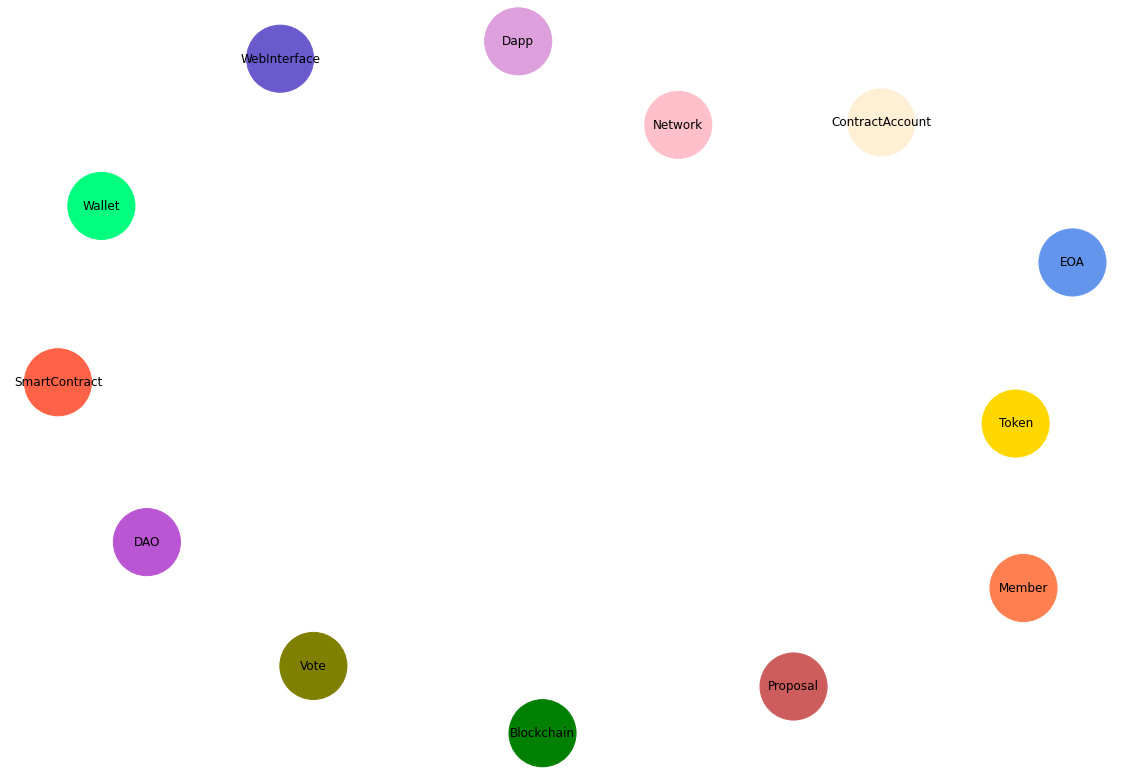

In [85]:
fig, ax = plt.subplots(figsize=(20,14))
daos_layout = nx.spring_layout(g_daos, 
                       k=3, iterations=50,
                       seed=2)
node_colors = []
for node in g_daos.nodes:
    node_colors.append(g_daos.nodes[node].get('color', 'olive'))
nx.draw(g_daos, 
        pos = daos_layout, 
        node_color = node_colors,
        node_size=4500,
        with_labels=True
       )
plt.show()

In [86]:
# Asignamos formas a los nodos de acuerdo 
# a su categoría.
g_daos.nodes["Blockchain"]['shape'] = 'h'
g_daos.nodes["Token"]['shape'] = '*'
g_daos.nodes["Network"]['shape'] = 'P'
g_daos.nodes["Dapp"]['shape'] = 'o'
g_daos.nodes["DAO"]['shape'] = 'o'
g_daos.nodes["WebInterface"]['shape'] = 'p'
g_daos.nodes["ContractAccount"]['shape'] = 's'
g_daos.nodes["SmartContract"]['shape'] = 's'
g_daos.nodes["EOA"]['shape'] = 's'
g_daos.nodes["Member"]['shape'] = 's'
g_daos.nodes["Proposal"]['shape'] = 'd'
g_daos.nodes["Vote"]['shape'] = 'd'
g_daos.nodes["Wallet"]['shape'] = '^'

In [87]:
# Nos quedamos con todas las posibles formas establecidas
# como atributos de cada nodo.
node_shapes = set((node[1]['shape'] for node in g_daos.nodes(data=True)))
node_shapes

{'*', 'P', '^', 'd', 'h', 'o', 'p', 's'}

In [88]:
color_dictionary_shape = {'*': 'gold', '^': 'crimson', 
                          'd':'olive', 'h': 'green',
                          'p':'slateblue', 'o':'mediumorchid',
                          's':'teal', 'P':'pink'
                         }
color_dictionary_shape

{'*': 'gold',
 '^': 'crimson',
 'd': 'olive',
 'h': 'green',
 'p': 'slateblue',
 'o': 'mediumorchid',
 's': 'teal',
 'P': 'pink'}

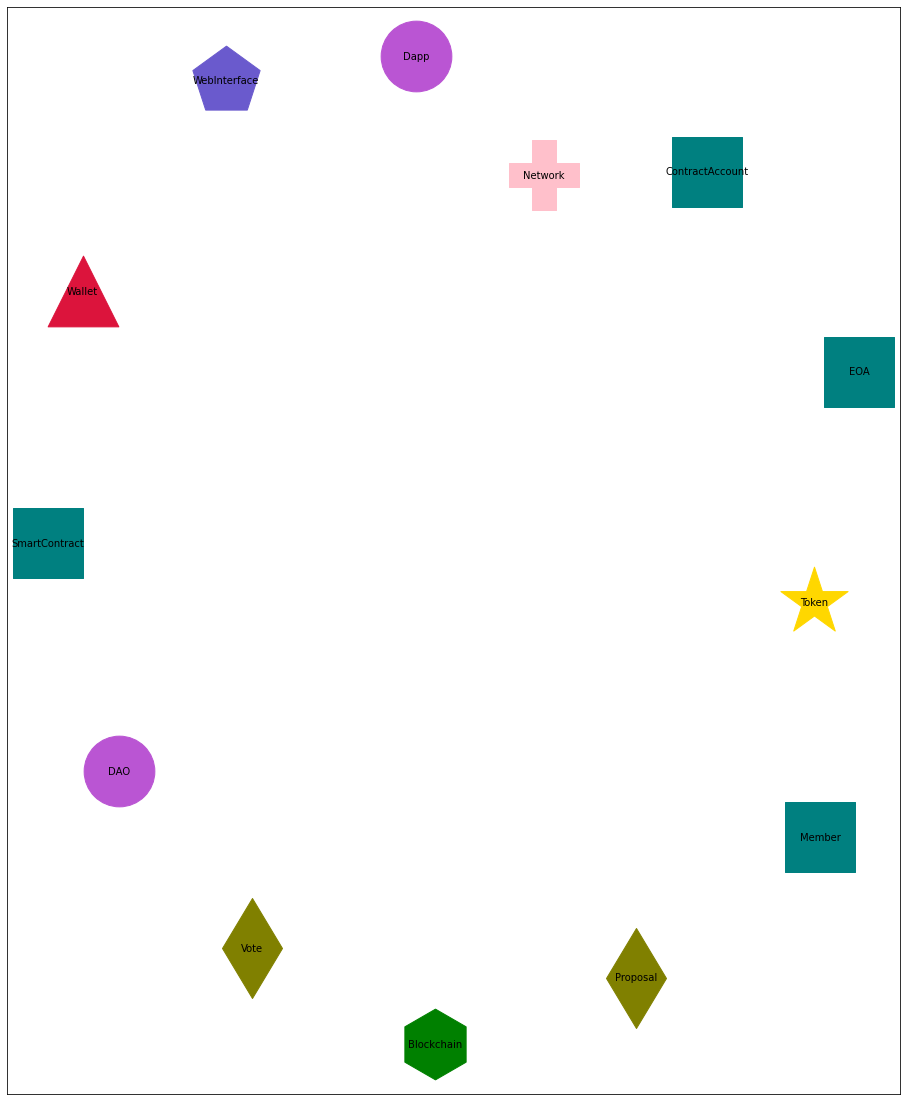

In [89]:
fig, ax = plt.subplots(figsize=(16,20))
daos_layout = nx.spring_layout(g_daos, 
                       k=3, iterations=50,
                       seed=2)
for shape in node_shapes:
    nx.draw_networkx_nodes(g_daos,
                           pos=daos_layout,
                           node_color = (color_dictionary_shape[shape] 
                                         if shape in color_dictionary_shape.keys() else 'olive'),
                           node_shape = shape,
                           node_size = 5000,
                           nodelist = [node[0] for node in g_daos.nodes(data=True) 
                                       if node[1]['shape'] == shape])
nx.draw_networkx_labels(g_daos, pos=daos_layout, font_size='10')
plt.show()

### 3.2. Edges